In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Importing pandas and numpy library


In [ ]:
import pandas as pd 
import numpy as np 

In [ ]:
column_name = ['Image', 'Position']
labels = pd.read_csv('/content/drive/MyDrive/Data_set/Intern ship/labels.csv', names=column_name)
len(labels)

1269

In [ ]:
labels

,Image,Position
0,Image_1.jpg,sitting
1,Image_4.jpg,sleeping
2,Image_6.jpg,sleeping
3,Image_15.jpg,sleeping
4,Image_33.jpg,sitting
...,...,...
1264,Image_12527.jpg,running
1265,Image_12577.jpg,sleeping
1266,Image_12594.jpg,sleeping
1267,Image_12596.jpg,sitting


In [ ]:
running = labels[(labels['Position'] == 'running')]
sitting = labels[(labels['Position'] == 'sitting')]
sleeping = labels[(labels['Position'] == 'sleeping')]

print(len(running))
print(len(sitting))
print(len(sleeping))

190
379
700


# Separating images and storing them into three different folder according to pose

In [ ]:
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys

# labels = pd.read_csv(r'D:\4 th semester\Projects\DSP\train.zip.001\editedtrainLabels.csv')
train_dir =r'/content/drive/MyDrive/Data_set/Intern ship/images'
DR = r"/content/drive/MyDrive/Data_set/Intern ship/DR"
if not os.path.exists(DR):
    os.mkdir(DR)

for filename, class_name in labels.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(DR + str(class_name)):
        os.mkdir(DR + str(class_name))
    src_path = train_dir + '/'+ filename
    dst_path = DR + str(class_name) + '/' + filename
    try:
        shutil.copy(src_path, dst_path)
        print("sucessful")
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))

# Reading images from directory and converting to array 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
data_dir = ('/content/drive/MyDrive/Data_set/Intern ship/DR')

In [ ]:
data_dir

'/content/drive/MyDrive/Data_set/Intern ship/DR'

In [ ]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR')

In [ ]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR/DRsitting/Image_1.jpg'),
 PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR/DRsitting/Image_33.jpg'),
 PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR/DRsitting/Image_62.jpg'),
 PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR/DRsitting/Image_195.jpg'),
 PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR/DRsitting/Image_201.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

1269


In [ ]:
DRsitting = list(data_dir.glob('DRsitting/*'))
DRsitting[:5]

[PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR/DRsitting/Image_1.jpg'),
 PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR/DRsitting/Image_33.jpg'),
 PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR/DRsitting/Image_62.jpg'),
 PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR/DRsitting/Image_195.jpg'),
 PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR/DRsitting/Image_201.jpg')]

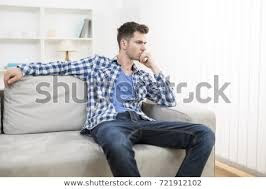

In [ ]:
PIL.Image.open(str(DRsitting[1]))

In [ ]:
position_images_dict = {
    'DRrunning': list(data_dir.glob('DRrunning/*')),
    'DRsitting': list(data_dir.glob('DRsitting/*')),
    'Dsleeping': list(data_dir.glob('Dsleeping/*')),
}

In [ ]:
position_labels_dict = {
    'DRrunning': 0,
    'DRsitting': 1,
    'Dsleeping': 2,
}

In [ ]:
position_images_dict['DRrunning'][:5]

[PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR/DRrunning/Image_37.jpg'),
 PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR/DRrunning/Image_75.jpg'),
 PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR/DRrunning/Image_183.jpg'),
 PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR/DRrunning/Image_218.jpg'),
 PosixPath('/content/drive/MyDrive/Data_set/Intern ship/DR/DRrunning/Image_228.jpg')]

In [ ]:
img = cv2.imread(str(position_images_dict['DRrunning'][0]))

In [ ]:
img.shape

(280, 180, 3)

In [ ]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [ ]:
X, y = [], []

for position_name, images in position_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        resized_img = resized_img.reshape((1,) + resized_img.shape)
        X.append(resized_img)
        y.append(position_labels_dict[position_name])

In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
X[0].shape

(1, 180, 180, 3)

In [ ]:
print(X.shape)

(569, 1, 180, 180, 3)


# Storing the Augumented images just for balancing dataset.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# img = load_img('/content/drive/MyDrive/Data_set/Intern ship/DRrunning')  
# x = img_to_array(img)  
# x = x.reshape((1,) + x.shape)  
# print(x.shape)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
j = 190
k = 0
while j<715:
  k+=1
  i = 0
  for batch in datagen.flow(X[k], batch_size=1,
                          save_to_dir='/content/drive/MyDrive/Data_set/Intern ship/test', save_prefix='running', save_format='jpg'):
    i += 1
    if i > 2:
        break  # otherwise the generator would loop indefinitely
  j+=3
print(k)

175


In [ ]:
data_dir = ('/content/drive/MyDrive/Data_set/Intern ship')
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('running/*')))
print(image_count)

511


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

# img = load_img('/content/drive/MyDrive/Data_set/Intern ship/DRrunning')  
# x = img_to_array(img)  
# x = x.reshape((1,) + x.shape)  
# print(x.shape)
# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
j = 379
k = 191
while j<709:
  k+=1
  i = 0
  for batch in datagen.flow(X[k], batch_size=1,
                          save_to_dir='/content/drive/MyDrive/Data_set/Intern ship/sitting', save_prefix='sitting', save_format='jpg'):
    i += 1
    if i > 0:
        break  # otherwise the generator would loop indefinitely
  j+=1
print(k)

521


In [ ]:
data_dir = ('/content/drive/MyDrive/Data_set/Intern ship')
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('running/*')))
print(image_count)

701


In [ ]:
data_dir = ('/content/drive/MyDrive/Data_set/Intern ship')
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('sitting/*')))
print(image_count)

704


In [ ]:
data_dir = ('/content/drive/MyDrive/Data_set/Intern ship')
data_dir = pathlib.Path(data_dir)
image_count = len(list(data_dir.glob('sleeping/*')))
print(image_count)

700


# Keypoints Generator

In [ ]:
!git clone https://github.com/misbah4064/human-pose-estimation-opencv.git
%cd human-pose-estimation-opencv/

Cloning into 'human-pose-estimation-opencv'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 20 (delta 5), reused 17 (delta 5), pack-reused 0
Unpacking objects: 100% (20/20), done.
/content/human-pose-estimation-opencv


In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

BODY_PARTS = { "Nose": 0, "Neck": 1, "RShoulder": 2, "RElbow": 3, "RWrist": 4,
               "LShoulder": 5, "LElbow": 6, "LWrist": 7, "RHip": 8, "RKnee": 9,
               "RAnkle": 10, "LHip": 11, "LKnee": 12, "LAnkle": 13, "REye": 14,
               "LEye": 15, "REar": 16, "LEar": 17, "Background": 18 }

POSE_PAIRS = [ ["Neck", "RShoulder"], ["Neck", "LShoulder"], ["RShoulder", "RElbow"],
               ["RElbow", "RWrist"], ["LShoulder", "LElbow"], ["LElbow", "LWrist"],
               ["Neck", "RHip"], ["RHip", "RKnee"], ["RKnee", "RAnkle"], ["Neck", "LHip"],
               ["LHip", "LKnee"], ["LKnee", "LAnkle"], ["Neck", "Nose"], ["Nose", "REye"],
               ["REye", "REar"], ["Nose", "LEye"], ["LEye", "LEar"] ]

width = 368
height = 368
inWidth = width
inHeight = height

net = cv.dnn.readNetFromTensorflow("graph_opt.pb")
thr = 0.2

def poseDetector(frame):
    frameWidth = frame.shape[1]
    frameHeight = frame.shape[0]
    
    net.setInput(cv.dnn.blobFromImage(frame, 1.0, (inWidth, inHeight), (127.5, 127.5, 127.5), swapRB=True, crop=False))
    out = net.forward()
    out = out[:, :19, :, :]  # MobileNet output [1, 57, -1, -1], we only need the first 19 elements

    assert(len(BODY_PARTS) == out.shape[1])

    points = []
    for i in range(len(BODY_PARTS)):
        # Slice heatmap of corresponging body's part.
        heatMap = out[0, i, :, :]

        _, conf, _, point = cv.minMaxLoc(heatMap)
        x = (frameWidth * point[0]) / out.shape[3]
        y = (frameHeight * point[1]) / out.shape[2]
        points.append((int(x), int(y)) if conf > thr else None)

    for pair in POSE_PAIRS:
        partFrom = pair[0]
        partTo = pair[1]
        assert(partFrom in BODY_PARTS)
        assert(partTo in BODY_PARTS)

        idFrom = BODY_PARTS[partFrom]
        idTo = BODY_PARTS[partTo]

        if points[idFrom] and points[idTo]:
            cv.line(frame, points[idFrom], points[idTo], (0, 255, 0), 3)
            cv.ellipse(frame, points[idFrom], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)
            cv.ellipse(frame, points[idTo], (3, 3), 0, 0, 360, (0, 0, 255), cv.FILLED)

    t, _ = net.getPerfProfile()
    # print(points)
    return points

# Generating csv file for unbalanced_keypoints

In [ ]:
import csv
import glob
path = "/content/drive/MyDrive/Data_set/Intern ship/DRrunning/*.*"
DRrunning=glob.glob(path)
path = "/content/drive/MyDrive/Data_set/Intern ship/DRsitting/*.*"
DRsitting=glob.glob(path)
path = "/content/drive/MyDrive/Data_set/Intern ship/DRsleeping/*.*"
DRsleeping=glob.glob(path)
with open('unbalanced_keypoints.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["FileName", "Keypoint", "Pose"])
    for element in DRrunning:
        writer.writerow([ntpath.basename(element), poseDetector(cv.imread(element)), "running"])
    for element in DRsitting:
        writer.writerow([ntpath.basename(element), poseDetector(cv.imread(element)), "sitting"])
    for element in DRsleeping:
        writer.writerow([ntpath.basename(element), poseDetector(cv.imread(element)), "sleeping"])

# Generating csv file for Balanced_keypoints

In [ ]:
import csv
import glob
path = "/content/drive/MyDrive/Data_set/Intern ship/running/*.*"
running=glob.glob(path)
path = "/content/drive/MyDrive/Data_set/Intern ship/sitting/*.*"
sitting=glob.glob(path)
path = "/content/drive/MyDrive/Data_set/Intern ship/sleeping/*.*"
sleeping=glob.glob(path)
with open('Balanced_keypoints.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["FileName", "Keypoint", "Pose"])
    for element in running:
        writer.writerow([ntpath.basename(element), poseDetector(cv.imread(element)), "running"])
    for element in sitting:
        writer.writerow([ntpath.basename(element), poseDetector(cv.imread(element)), "sitting"])
    for element in sleeping:
        writer.writerow([ntpath.basename(element), poseDetector(cv.imread(element)), "sleeping"])